#churn predicting using ANN
credit card customer churn prediction
it's a bank data that predict whether their customer still using bank or not.



In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [34]:
df=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
df.shape

(10000, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**target column is** 'exited'


In [41]:
#to check duplicate rows
df.duplicated().sum()

0

In [42]:
#to check the count of values that exited or not
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [43]:
#to find how many categories in geography column
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [44]:
#to check gender
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [45]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [46]:
#drop columns which are not important

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True ) #inplace true becoz for permanent changes

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:

X=df.iloc[:, 3:-1].values    #take 3 to one before last
y=df.iloc[:, -1].values
print(X)

[[4.2000000e+01 2.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [4.1000000e+01 1.0000000e+00 8.3807860e+04 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [4.2000000e+01 8.0000000e+00 1.5966080e+05 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [3.6000000e+01 7.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [4.2000000e+01 3.0000000e+00 7.5075310e+04 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [2.8000000e+01 4.0000000e+00 1.3014279e+05 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [49]:

print(y)

[1 0 1 ... 1 1 0]


#we have 2 columns 'Geography'	'Gender'
need to change in numeric format by using Label Encoding .



In [50]:
#covert categorical data ino numerical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:, 2]=le.fit_transform(X[:,2])
print(X)


[[4.2000000e+01 2.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [4.1000000e+01 1.0000000e+00 7.4300000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [4.2000000e+01 8.0000000e+00 5.7930000e+03 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [3.6000000e+01 7.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [4.2000000e+01 3.0000000e+00 4.2700000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [2.8000000e+01 4.0000000e+00 4.1120000e+03 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [51]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [52]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 2. Building the ANN

In [54]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [55]:
#initialize ANN
ann = tf.keras.models.Sequential()


Adding the input layer and the first hidden layer

In [56]:

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Adding the second hidden layer

In [57]:

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

adding output layer

In [58]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#3 - Training the ANN

In [59]:
#compile an ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the Training set

In [60]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7461 - loss: 0.5605
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7897 - loss: 0.5075
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8073 - loss: 0.4654
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7997 - loss: 0.4632
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7900 - loss: 0.4614
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4509
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7923 - loss: 0.4520
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8049 - loss: 0.4259
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7966 - loss: 0.4393
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7939 - loss: 0.4403
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8083 - loss: 0.4247
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

# 4 - Making the predictions and evaluating the model

In [61]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
# Your input with 12 features, pad with 5 more values (e.g. 0s)
input_data = [1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]

# Pad the remaining features, assuming 0 or another suitable value for those missing features
padded_input_data = input_data + [0] * (17 - len(input_data))

# Now, pass this to the scaler
print(ann.predict(sc.transform([padded_input_data])) > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[False]]


#Predicting the test set rule

In [66]:

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [67]:
#confusion matrix using sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1556   39]
 [ 285  120]]


0.838

Text(95.72222222222221, 0.5, 'Truth')

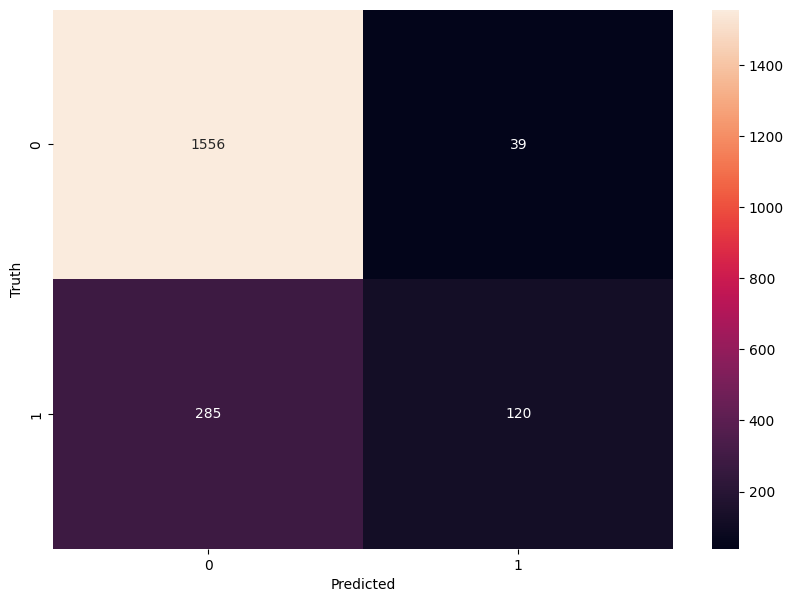

In [69]:
#confusion matrix using seaborn
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
y_test.shape

(2000,)

#accuracy


In [71]:
round((1556+120)/(1566+120+39+285),2)

0.83